In [ ]:
import cv2
import os
import numpy as np
import pandas as pd
from math import exp, sqrt
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import matplotlib.image as mpimg
from sklearn.utils import shuffle
import keras
import tensorflow as tf

import tensorflow.keras.backend as K
from keras import Input
from keras.models import Model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import  BatchNormalization, Concatenate, Add, DepthwiseConv2D, GlobalAveragePooling2D, SeparableConv2D
from tensorflow.keras.optimizers import SGD,RMSprop,Adam,Adagrad
from keras.layers import Conv2D, MaxPooling2D

# **Splitting the Data into Training and Testing**

In [ ]:
data_path='Gallbladder/Train' # Give your path here.
data_dir_list = ['0', '1' ,'2','3','4','5', '6','7','8']
img_data_list=[]
labels = []

for dataset in data_dir_list:
    img_list=os.listdir(data_path+'/'+ dataset)
    print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
    for img in img_list:
        input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
        # input_img=cv2.IMREAD_GRAYSCALE
        labels.append(dataset)
        input_img_resize=cv2.resize(input_img,(128,128))  # Here, Write your image size.
        img_data_list.append(input_img_resize)

label=np.array(labels)
data = np.array(img_data_list)
# print(data)
data = data.astype('float32')
data = data/255
data.shape


Loaded the images of dataset-0

Loaded the images of dataset-1

Loaded the images of dataset-2

Loaded the images of dataset-3

Loaded the images of dataset-4

Loaded the images of dataset-5

Loaded the images of dataset-6

Loaded the images of dataset-7

Loaded the images of dataset-8



(7482, 128, 128, 3)

In [ ]:
from keras.utils import to_categorical
num_classes = 9
y_train = to_categorical(label, num_classes)
x_train, y_train = shuffle(data, y_train, random_state=2)
x_train = x_train.reshape(-1,128,128 ,3)

In [ ]:
data_path='Gallbladder/Validation' # Give your path here.
data_dir_list = ['0', '1' ,'2','3','4','5', '6','7','8']
img_data_list=[]
labels = []

for dataset in data_dir_list:
    img_list=os.listdir(data_path+'/'+ dataset)
    print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
    for img in img_list:
        input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
        # input_img=cv2.IMREAD_GRAYSCALE
        labels.append(dataset)
        input_img_resize=cv2.resize(input_img,(128,128))  # Here, Write your image size.
        img_data_list.append(input_img_resize)

label=np.array(labels)
data = np.array(img_data_list)
# print(data)
data = data.astype('float32')
data = data/255
data.shape

Loaded the images of dataset-0

Loaded the images of dataset-1

Loaded the images of dataset-2

Loaded the images of dataset-3

Loaded the images of dataset-4

Loaded the images of dataset-5

Loaded the images of dataset-6

Loaded the images of dataset-7

Loaded the images of dataset-8



(2136, 128, 128, 3)

In [ ]:
from keras.utils import to_categorical
num_classes = 9
y_val = to_categorical(label, num_classes)
x_val, y_val = shuffle(data, y_val, random_state=2)
x_val = x_val.reshape(-1,128,128 ,3)

In [ ]:
data_path='Gallbladder/Test' # Give your path here.
data_dir_list = ['0', '1' ,'2','3','4','5', '6','7','8' ]
img_data_list=[]
labels = []

for dataset in data_dir_list:
    img_list=os.listdir(data_path+'/'+ dataset)
    print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
    for img in img_list:
        input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
        # input_img=cv2.IMREAD_GRAYSCALE
        labels.append(dataset)
        input_img_resize=cv2.resize(input_img,(128,128))  # Here, Write your image size.
        img_data_list.append(input_img_resize)

label=np.array(labels)
data = np.array(img_data_list)
# print(data)
data = data.astype('float32')
data = data/255
data.shape

Loaded the images of dataset-0

Loaded the images of dataset-1

Loaded the images of dataset-2

Loaded the images of dataset-3

Loaded the images of dataset-4

Loaded the images of dataset-5

Loaded the images of dataset-6

Loaded the images of dataset-7

Loaded the images of dataset-8



(1074, 128, 128, 3)

In [ ]:
from keras.utils import to_categorical
num_classes = 9
y_test = to_categorical(label, num_classes)
x_test, y_test = shuffle(data, y_test, random_state=2)
x_test = x_test.reshape(-1,128,128 ,3)

In [ ]:
import tensorflow
METRICS = [tensorflow.keras.metrics.CategoricalAccuracy(name='accuracy'),
           tensorflow.keras.metrics.Precision(name='precision'),
           tensorflow.keras.metrics.Recall(name='recall'),
           tensorflow.keras.metrics.AUC(name='auc')]

In [ ]:
from tensorflow.keras.layers import Dense, Reshape, Softmax, Permute, Add, Lambda
import tensorflow.keras.backend as K

def self_attention(input_feature_map):
    shape = K.int_shape(input_feature_map)  # (batch_size, height, width, channels)
    batch_size, height, width, channels = shape

    # Flatten the spatial dimensions (height, width) to treat them as sequence elements
    flat_feature_map = Reshape((height * width, channels))(input_feature_map)  # (batch_size, height*width, channels)

    # Compute Query, Key, and Value matrices with more complexity
    query_dense1 = Dense(channels // 4, activation='relu')(flat_feature_map)   # (batch_size, height*width, channels // 4)
    key_dense1 = Dense(channels // 4, activation='relu')(flat_feature_map)     # (batch_size, height*width, channels // 4)
    value_dense1 = Dense(channels // 2, activation='relu')(flat_feature_map)   # (batch_size, height*width, channels // 2)

    query = Dense(channels // 8)(query_dense1)  # (batch_size, height*width, channels // 8)
    key = Dense(channels // 8)(key_dense1)      # (batch_size, height*width, channels // 8)
    value = Dense(channels)(value_dense1)       # (batch_size, height*width, channels)

    # Transpose the Key for dot product
    key_transposed = Permute((2, 1))(key)  # (batch_size, channels // 8, height*width)

    # Compute attention scores (dot product between Query and transposed Key)
    attention_scores = Lambda(lambda x: K.batch_dot(x[0], x[1]),
                              output_shape=(height * width, height * width))([query, key_transposed])

    # Apply softmax to the attention scores
    attention_scores = Softmax()(attention_scores)  # (batch_size, height*width, height*width)

    # Apply the attention scores to the Value matrix
    attention_output = Lambda(lambda x: K.batch_dot(x[0], x[1]),
                              output_shape=(height * width, channels))([attention_scores, value])  # (batch_size, height*width, channels)

    # Reshape the attention output back to the original feature map shape
    attention_output = Reshape((height, width, channels))(attention_output)

    # Add the input to the attention output (residual connection)
    output = Add()([input_feature_map, attention_output])

    return output

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import (
    Conv2D, BatchNormalization, ReLU, DepthwiseConv2D, Multiply,
    Concatenate, GlobalAveragePooling2D, Dense, Activation, Add, Dropout
)
from tensorflow.keras.models import Model

# Input Layer
input_layer = tf.keras.Input(shape=(128, 128, 3))

# Initial Convolution Block
x = Conv2D(32, (3, 3), strides=(2, 2), padding='same', activation='relu')(input_layer)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
x = BatchNormalization()(x)

# Depthwise Separable Convolution Block
x = DepthwiseConv2D((3, 3), padding='same', strides=(1, 1))(x)
x = BatchNormalization()(x)
x = ReLU()(x)

# Dilated Convolution Branches for Multi-scale Features
x1 = Conv2D(128, (3, 3), dilation_rate=1, padding='same', activation='relu')(x)
x1 = BatchNormalization()(x1)
x2 = Conv2D(128, (3, 3), dilation_rate=3, padding='same', activation='relu')(x)
x2 = BatchNormalization()(x2)
x3 = Conv2D(128, (3, 3), dilation_rate=5, padding='same', activation='relu')(x)
x3 = BatchNormalization()(x3)

# Adding Branch Outputs
A1 = Add()([x1, x2, x3])

# Intermediate Convolutional Block
x4 = Conv2D(128, (3, 3), padding='same', activation='relu')(A1)
x4 = BatchNormalization()(x4)

x = complex_attention(x4)

# Concatenation Block
C1 = Concatenate()([x, x2, x3])
x5 = Conv2D(128, (3, 3), padding='same', activation='relu')(C1)

# Residual Connection
C2 = Concatenate()([x5, x])
x = Conv2D(256, (3, 3), padding='same', activation='relu')(C2)
x = BatchNormalization()(x)

# Expanded Depthwise Separable Convolution Block
x = DepthwiseConv2D((3, 3), padding='same', strides=(1, 1))(x)
x = BatchNormalization()(x)
x = ReLU()(x)
x = Conv2D(256, (1, 1), padding='same', activation='relu')(x)
x = BatchNormalization()(x)

# Additional Residual Connection
residual = Conv2D(256, (1, 1), padding='same', activation='relu')(C2)
x = Add()([x, residual])

# Further Convolutional Layers
x = Conv2D(256, (3, 3), padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = Conv2D(512, (3, 3), padding='same', activation='relu')(x)
x = BatchNormalization()(x)

# Global Pooling
x = GlobalAveragePooling2D()(x)

# Fully Connected Layers
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)
output = Dense(9, activation='softmax')(x)

# Model Compilation
model = Model(inputs=input_layer, outputs=output)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics= METRICS)
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 128, 128, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 64, 64, 32)     │            896 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 64, 64, 32)     │            128 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 64, 64, 64)     │         18,496 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 64, 64, 64)     │            256 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ depthwise_conv2d          │ (None, 64, 64, 64)     │            640 │ batch_normalization_1… │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 64, 64, 64)     │            256 │ depthwise_conv2d[0][0] │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu (ReLU)              │ (None, 64, 64, 64)     │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 64, 64, 128)    │         73,856 │ re_lu[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 64, 64, 128)    │         73,856 │ re_lu[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 64, 64, 128)    │         73,856 │ re_lu[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 64, 64, 128)    │            512 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 64, 64, 128)    │            512 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_5     │ (None, 64, 64, 128)    │            512 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 64, 64, 128)    │              0 │ batch_normalization_3… │
│                           │                        │                │ batch_normalization_4… │
│                           │                        │                │ batch_normalization_5… │
├──────────────────────

 Total params: 3,757,161 (14.33 MB)

 Trainable params: 3,752,745 (14.32 MB)

 Non-trainable params: 4,416 (17.25 KB)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint('model-{epoch:03d}-{accuracy:03f}-{val_accuracy:03f}.keras',
    verbose=1,
    monitor='val_accuracy',
    save_best_only=True,
    mode='auto')

In [ ]:
history = model.fit( x_train, y_train, batch_size = 16, epochs = 50,
                    validation_data = (x_val , y_val), callbacks=[checkpoint], verbose =1)

Epoch 1/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step - accuracy: 0.2203 - auc: 0.6424 - loss: 2.0979 - precision: 0.3871 - recall: 0.0191
Epoch 1: val_accuracy improved from -inf to 0.14045, saving model to model-001-0.259155-0.140449.keras
468/468 ━━━━━━━━━━━━━━━━━━━━ 274s 484ms/step - accuracy: 0.2204 - auc: 0.6425 - loss: 2.0977 - precision: 0.3874 - recall: 0.0191 - val_accuracy: 0.1404 - val_auc: 0.5598 - val_loss: 3.7795 - val_precision: 0.2802 - val_recall: 0.0651
Epoch 2/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step - accuracy: 0.3449 - auc: 0.7824 - loss: 1.7625 - precision: 0.6067 - recall: 0.0979
Epoch 2: val_accuracy improved from 0.14045 to 0.29822, saving model to model-002-0.370489-0.298221.keras
468/468 ━━━━━━━━━━━━━━━━━━━━ 182s 386ms/step - accuracy: 0.3450 - auc: 0.7824 - loss: 1.7624 - precision: 0.6067 - recall: 0.0979 - val_accuracy: 0.2982 - val_auc: 0.7462 - val_loss: 2.2639 - val_precision: 0.3608 - val_recall: 0.2051
Epoch 3/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [ ]:
loss, acc, prec, rec, auc = model.evaluate(x_test, y_test)

34/34 ━━━━━━━━━━━━━━━━━━━━ 34s 549ms/step - accuracy: 0.9793 - auc: 0.9979 - loss: 0.0703 - precision: 0.9807 - recall: 0.9791


In [ ]:
model.load_weights('/content/model-031-0.979685-0.992509.keras')
print("Model is loaded")

Model is loaded


In [ ]:
loss, acc, prec, rec, auc = model.evaluate(x_test, y_test)

34/34 ━━━━━━━━━━━━━━━━━━━━ 9s 251ms/step - accuracy: 0.9909 - auc: 1.0000 - loss: 0.0253 - precision: 0.9909 - recall: 0.9880


34/34 ━━━━━━━━━━━━━━━━━━━━ 12s 296ms/step


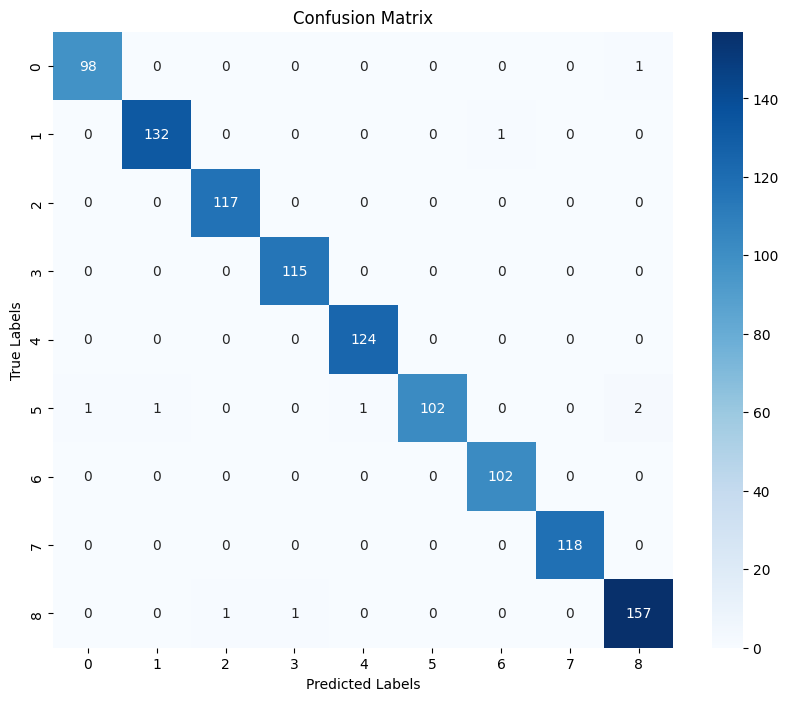

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels



# Get predicted labels (convert one-hot encoded predictions back to class labels)
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert one-hot encoded y_test back to class labels
y_true = np.argmax(y_test, axis=1)

# Create confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=unique_labels(y_true),
            yticklabels=unique_labels(y_true))

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


34/34 ━━━━━━━━━━━━━━━━━━━━ 9s 253ms/step


<ipython-input-20-4dd10f538c5b>:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', num_classes)  # Use a colormap for multiple classes


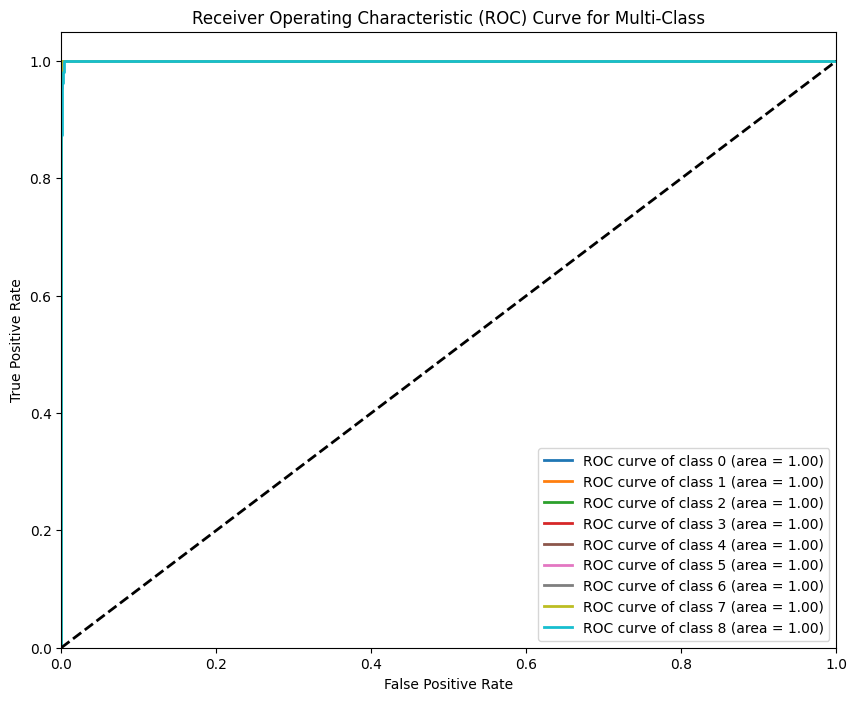

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Assuming your test data is loaded
# Replace `x_test` and `y_test` with your actual test data
num_classes = 9  # Update the number of classes to 9

# Evaluate the model
loss, acc, prec, rec, auc_score = model.evaluate(x_test, y_test, verbose=0)

# Generate predictions
y_pred = model.predict(x_test)  # Assuming `x_test` is your test data

# Binarize the true labels
y_true_bin = label_binarize(y_test, classes=np.arange(num_classes))

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for all classes
plt.figure(figsize=(10, 8))
colors = plt.cm.get_cmap('tab10', num_classes)  # Use a colormap for multiple classes
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], color=colors(i), lw=2,
             label=f'ROC curve of class {i} (area = {roc_auc[i]:0.2f})')

# Add diagonal line for reference
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Set plot limits and labels
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multi-Class')
plt.legend(loc="lower right")
plt.show()

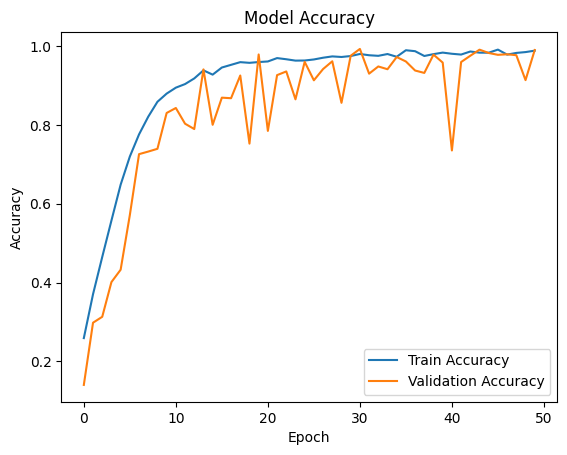

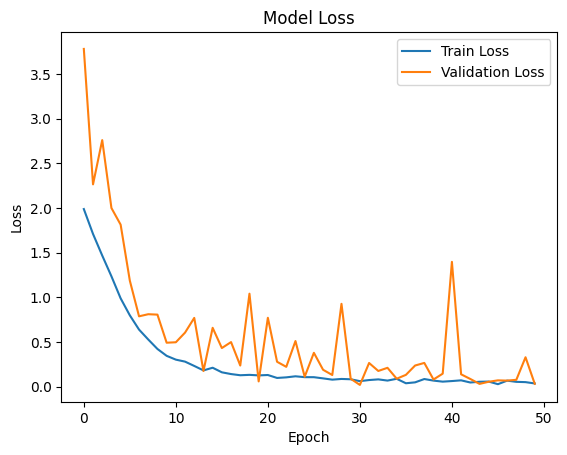

In [ ]:
import matplotlib.pyplot as plt

def plot_accuracy(history):
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

def plot_loss(history):
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
plot_accuracy(history)
plot_loss(history)

34/34 ━━━━━━━━━━━━━━━━━━━━ 9s 254ms/step
Class-wise metrics:
Class 0:
  Accuracy    : 0.9799
  Precision   : 0.9899
  Recall      : 0.9899
  Specificity : 0.9990
  F1-Score    : 0.9899

Class 1:
  Accuracy    : 0.9850
  Precision   : 0.9925
  Recall      : 0.9925
  Specificity : 0.9989
  F1-Score    : 0.9925

Class 2:
  Accuracy    : 0.9915
  Precision   : 0.9915
  Recall      : 1.0000
  Specificity : 0.9990
  F1-Score    : 0.9957

Class 3:
  Accuracy    : 0.9914
  Precision   : 0.9914
  Recall      : 1.0000
  Specificity : 0.9990
  F1-Score    : 0.9957

Class 4:
  Accuracy    : 0.9920
  Precision   : 0.9920
  Recall      : 1.0000
  Specificity : 0.9989
  F1-Score    : 0.9960

Class 5:
  Accuracy    : 0.9533
  Precision   : 1.0000
  Recall      : 0.9533
  Specificity : 1.0000
  F1-Score    : 0.9761

Class 6:
  Accuracy    : 0.9903
  Precision   : 0.9903
  Recall      : 1.0000
  Specificity : 0.9990
  F1-Score    : 0.9951

Class 7:
  Accuracy    : 1.0000
  Precision   : 1.0000
  Recall 

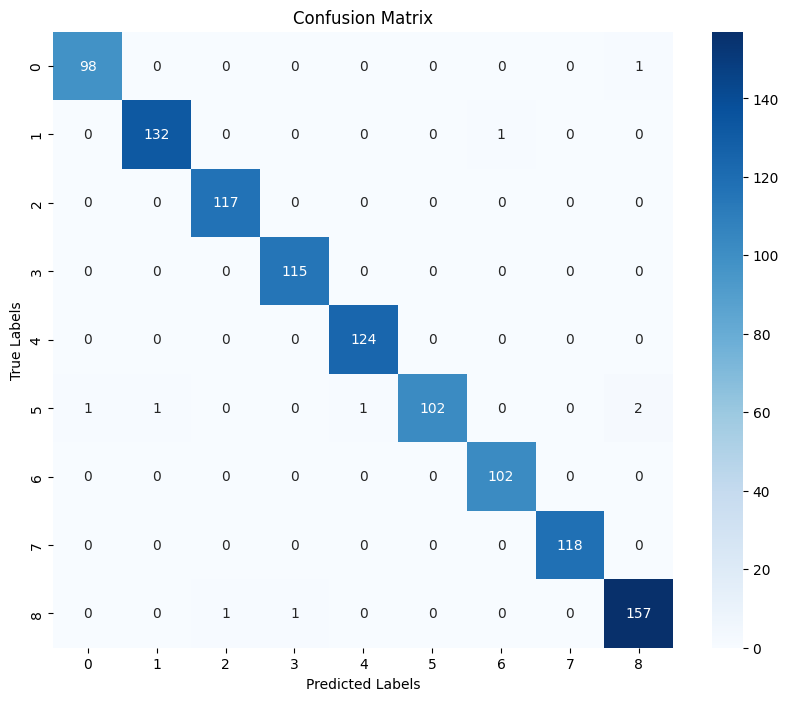

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.utils.multiclass import unique_labels

# Get predicted labels (convert one-hot encoded predictions back to class labels)
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert one-hot encoded y_test back to class labels
y_true = np.argmax(y_test, axis=1)

# Create confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Compute class-wise metrics
report = classification_report(y_true, y_pred_classes, output_dict=True)

# Compute specificity
specificity = {}
for i in range(conf_matrix.shape[0]):
    tn = np.sum(conf_matrix) - (np.sum(conf_matrix[i, :]) + np.sum(conf_matrix[:, i]) - conf_matrix[i, i])
    fp = np.sum(conf_matrix[:, i]) - conf_matrix[i, i]
    specificity[i] = tn / (tn + fp) if (tn + fp) > 0 else 0

# Print class-wise results
print("Class-wise metrics:")
for label in unique_labels(y_true):
    print(f"Class {label}:")
    print(f"  Accuracy    : {report[str(label)]['precision'] * report[str(label)]['recall']:.4f}")
    print(f"  Precision   : {report[str(label)]['precision']:.4f}")
    print(f"  Recall      : {report[str(label)]['recall']:.4f}")
    print(f"  Specificity : {specificity[label]:.4f}")
    print(f"  F1-Score    : {report[str(label)]['f1-score']:.4f}")
    print()

# Compute AUC if applicable
if y_pred.shape[1] > 1:  # Multi-class case
    auc = roc_auc_score(y_test, y_pred, multi_class="ovr")
    print(f"Overall AUC: {auc:.4f}")

# Plot confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=unique_labels(y_true),
            yticklabels=unique_labels(y_true))

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()